# **특징점 검출 및 추적 기초**

## **1. 실습 환경 구축**

- 데이터/이미지 파일 다운로드

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
!wget https://raw.githubusercontent.com/SkyLectures/SkyLectures.github.io/main/materials/ai/images/S03-02-03-02_01-002.jpg -O ./images/road_image.jpg

--2025-11-15 15:20:17--  https://raw.githubusercontent.com/SkyLectures/SkyLectures.github.io/main/materials/ai/images/S03-02-03-02_01-001.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676844 (661K) [image/jpeg]
Saving to: ‘./images/traffic_light.jpg’

./images/traffic_li 100%[===================>] 660.98K  --.-KB/s    in 0.04s   

2025-11-15 15:20:17 (14.6 MB/s) - ‘./images/traffic_light.jpg’ saved [676844/676844]



- 경고메시지 무시

In [ ]:
import warnings
warnings.filterwarnings('ignore')

- 한글 폰트 설정

In [ ]:
!apt install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [ ]:
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

- 음수 부호 설정

In [ ]:
plt.rc("axes", unicode_minus = False)

## **2. 주요 특징점 검출 알고리즘**

In [ ]:
import cv2
import numpy as np

In [ ]:
# 이미지 불러오기
img_color = cv2.imread('./images/road_image.jpg')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

### 2.1 해리스 코너 검출기

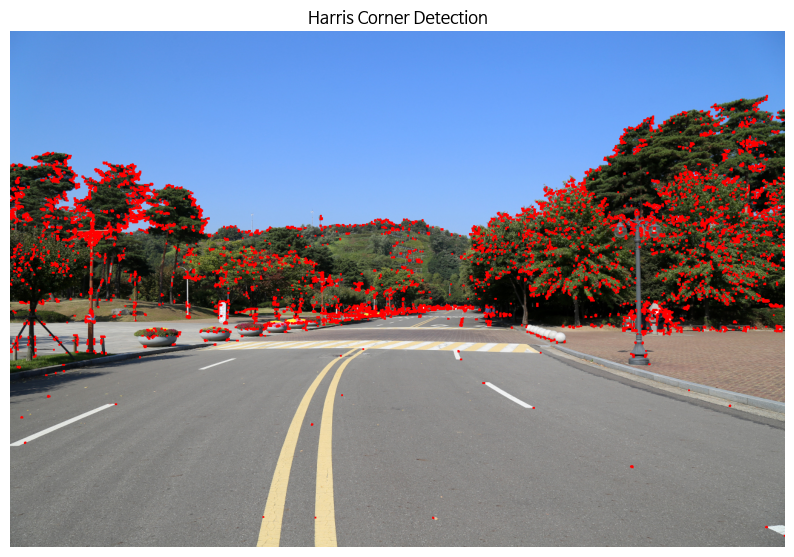

검출된 코너 개수: 55184


In [ ]:
# 해리스 코너 검출
img_gray = np.float32(img_gray)
img_gray_dst = cv2.cornerHarris(img_gray, blockSize=2, ksize=3, k=0.04)

# 코너 강화 (dilate)
dst = cv2.dilate(img_gray_dst, None)

# 임계값 이상인 부분을 빨간색으로 표시 (코너)
threshold = 0.01 * dst.max()
img_color[dst > threshold] = [0, 0, 255]  # 빨간색으로 표시

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

# 코너 개수 출력
corner_count = np.sum(dst > threshold)
print(f"검출된 코너 개수: {corner_count}")

### 2.2 SIFT

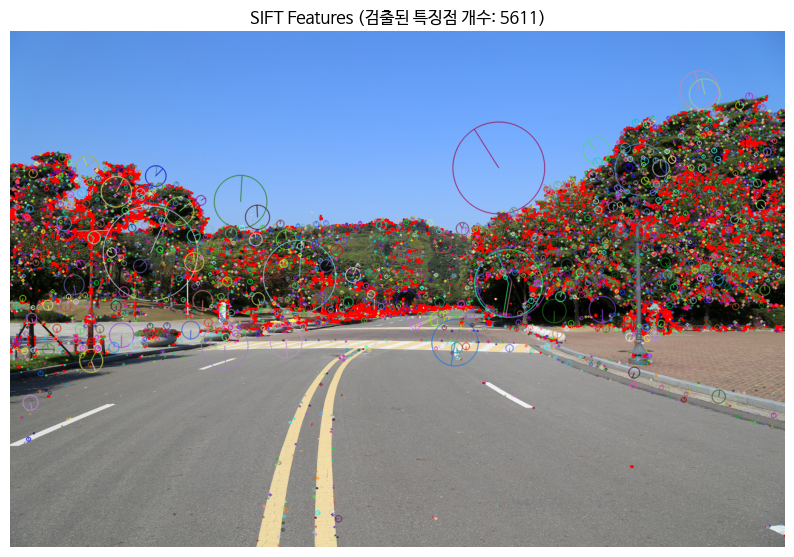

특징점 개수: 5611
디스크립터 형태: (5611, 128)
각 디스크립터의 차원: 128


In [ ]:
# SIFT 객체 생성
sift = cv2.SIFT_create()

# 특징점 검출 및 디스크립터 계산
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

# 특징점 그리기
img_sift = cv2.drawKeypoints(img_color, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Features (검출된 특징점 개수: {len(keypoints)})')
plt.axis('off')
plt.show()

# 디스크립터 정보 출력
if descriptors is not None:
    print(f"특징점 개수: {len(keypoints)}")
    print(f"디스크립터 형태: {descriptors.shape}")
    print(f"각 디스크립터의 차원: {descriptors.shape[1]}")

### 2.3 SURF

In [ ]:
try:
    # SURF 객체 생성 (xfeatures2d 모듈 필요)
    surf = cv2.xfeatures2d.SURF_create()

    # 특징점 검출 및 디스크립터 계산
    keypoints_surf, descriptors_surf = surf.detectAndCompute(img_gray, None)

    # 특징점 그리기
    img_surf = cv2.drawKeypoints(img_color, keypoints_surf, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # 결과 시각화
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_surf, cv2.COLOR_BGR2RGB))
    plt.title(f'SURF Features (검출된 특징점 개수: {len(keypoints_surf)})')
    plt.axis('off')
    plt.show()

    if descriptors_surf is not None:
        print(f"SURF 특징점 개수: {len(keypoints_surf)}")
        print(f"SURF 디스크립터 형태: {descriptors_surf.shape}")

except AttributeError:
    print("SURF를 사용하려면 `opencv-contrib-python`을 설치하고, `cv2.xfeatures2d` 모듈을 불러와야 합니다.")
    print("pip install opencv-contrib-python")
except Exception as e:
    print(f"SURF 실행 중 오류 발생: {e}")

SURF 실행 중 오류 발생: OpenCV(4.12.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'



### 2.4 ORB

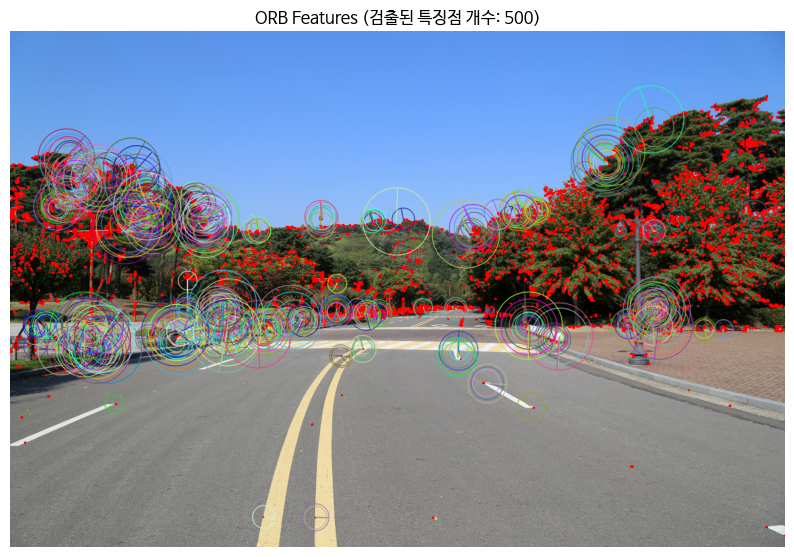

ORB 특징점 개수: 500
ORB 디스크립터 형태: (500, 32)


In [ ]:
# ORB 객체 생성 (최대 특징점 개수, 스케일 팩터 등 설정 가능)
orb = cv2.ORB_create(nfeatures=500, scaleFactor=1.2, nlevels=8)

# 특징점 검출 및 디스크립터 계산
keypoints_orb, descriptors_orb = orb.detectAndCompute(img_gray, None)

# 특징점 그리기
img_orb = cv2.drawKeypoints(img_color, keypoints_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_orb, cv2.COLOR_BGR2RGB))
plt.title(f'ORB Features (검출된 특징점 개수: {len(keypoints_orb)})')
plt.axis('off')
plt.show()

if descriptors_orb is not None:
    print(f"ORB 특징점 개수: {len(keypoints_orb)}")
    print(f"ORB 디스크립터 형태: {descriptors_orb.shape}")

## **3. 특징점 매칭 및 추적**

### 3.1 특징점 매칭

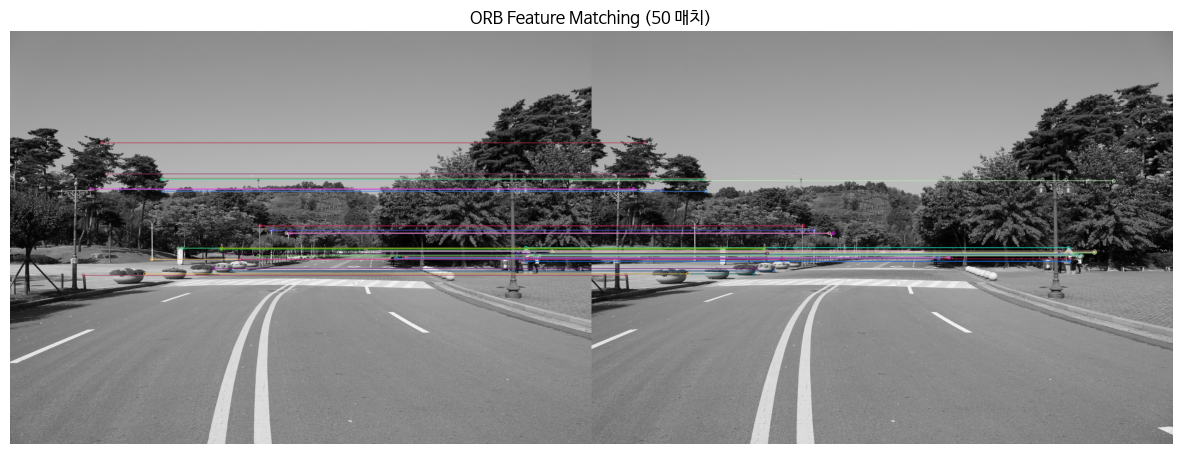

총 매치된 특징점 개수: 369
상위 50개 매치 그리기.


In [ ]:
# 매칭을 위한 두 번째 이미지 로드 (첫 번째 이미지와 유사하지만 약간 다른 시점/객체)
img1 = cv2.imread('./images/road_image2.jpg', cv2.IMREAD_GRAYSCALE) # 원본 이미지 (gray1)
img2 = cv2.imread('./images/road_image2_shifted.jpg', cv2.IMREAD_GRAYSCALE) # 약간 이동된 이미지 (gray2)

if img1 is None or img2 is None:
    print("두 번째 이미지를 찾을 수 없습니다. 'road_image_shifted.jpg' 파일을 확인하거나 생성하세요.")
    exit()

# ORB 특징점 검출기 생성
orb = cv2.ORB_create(nfeatures=500)

# 두 이미지에서 특징점 및 디스크립터 검출
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher 생성 (ORB는 바이너리 디스크립터이므로 NORM_HAMMING 사용)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # crossCheck=True는 양방향 매칭으로 오매칭 줄임

# 특징점 매칭
matches = bf.match(des1, des2)

# 매칭 결과 거리에 따라 정렬 (거리가 짧을수록 유사함)
matches = sorted(matches, key=lambda x: x.distance)

# 상위 N개의 매칭 결과만 시각화
num_matches_to_draw = min(50, len(matches))
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:num_matches_to_draw], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 시각화
plt.figure(figsize=(15, 10))
plt.imshow(img_matches), plt.title(f'ORB Feature Matching ({num_matches_to_draw} 매치)')
plt.axis('off')
plt.show()

print(f"총 매치된 특징점 개수: {len(matches)}")
print(f"상위 {num_matches_to_draw}개 매치 그리기.")

### 3.2 특징점 추적

- CoLab에서는 실행되지 않음

In [ ]:
# 매칭을 위한 두 번째 이미지 로드 (첫 번째 이미지와 유사하지만 약간 다른 시점/객체)
# 추적을 위한 이전 프레임과 현재 프레임에서 Good Features to Track 사용
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# 옵티컬 플로우를 위한 파라미터
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 임의의 색상 (추적 선 그리기 용도)
color = np.random.randint(0,255,(100,3))

# 비디오 캡처 객체 생성 (0번 카메라 또는 비디오 파일)
cap = cv2.VideoCapture('video.mp4') # 'video.mp4' 파일 경로를 사용하거나 0으로 실시간 카메라 사용

if not cap.isOpened():
    print("오류: 비디오 파일 또는 카메라를 열 수 없습니다.")
    exit()

# 첫 번째 프레임 읽기
ret, old_frame = cap.read()
if not ret:
    print("첫 프레임을 읽을 수 없습니다.")
    exit()

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params) # 추적할 초기 특징점 찾기

# 추적된 점들을 그릴 마스크 이미지 생성
mask = np.zeros_like(old_frame)

while True:
    ret, frame = cap.read()
    if not ret:
        print("프레임을 모두 읽었습니다. 또는 더 이상 프레임이 없습니다.")
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 옵티컬 플로우 계산 (이전 프레임의 점 p0를 현재 프레임에서 추적하여 p1 얻기)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 제대로 추적된 점들만 선택
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]

        # 추적 선과 점 그리기
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a),int(b)),5, color[i].tolist(),-1)
        img_track = cv2.add(frame,mask)

        cv2.imshow('Feature Tracking', img_track)

        # 'q' 키를 누르면 종료
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # 다음 프레임을 위해 현재 프레임과 점들을 업데이트
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1,1,2)
    else:
        cv2.imshow('Feature Tracking', frame) # 추적된 점이 없어도 원본 프레임 표시
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# 자원 해제
cap.release()
cv2.destroyAllWindows()
print("특징점 추적 종료.")